<a href="https://colab.research.google.com/github/Raksantos/A.I-Studying/blob/master/Clustering_extraindo_padr%C3%B5es_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd

df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Pré-Processamento

In [ ]:
df.drop(columns = ['CUST_ID', 'TENURE'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
missing_data = df.isna().sum()
missing_data

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
df.fillna(df.median(), inplace=True)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [ ]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

#Clusterização dos Dados

In [ ]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5, n_init=10, max_iter = 300)
y_pred = cluster.fit_predict(values)

In [ ]:
from sklearn import metrics

labels = cluster.labels_
silhouette = metrics.silhouette_score(values, labels, metric="euclidean")
silhouette #valor bom, pois o silhouette varia de -1 até 1. Sendo maior que 0, já é algo positivo

0.36451198422831005

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.0754963863506783

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.79476705023

In [ ]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
  labels = kmeans.fit_predict(dataset)

  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)

  return s, dbs, calinski

In [ ]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3271878995413032 1.304028302273611 3526.344301904406


In [ ]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36441830788777224 1.0760267630682159 3431.784426013862


In [ ]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3513119469650607 1.1172342138727465 3019.197758451491


In [ ]:
import numpy as np

In [ ]:
df.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [ ]:
random_data = np.random.rand(8950, 16)
clustering_algorithm(5, random_data)

(0.04033651168566084, 3.4753871174632556, 305.43898611642123)

In [ ]:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, calinski1 = clustering_algorithm(5, set1)
print(s1, dbs1, calinski1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
print(s2, dbs2, calinski2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s3, dbs3, calinski3)

0.3689813559141016 1.058368065665044 1204.0476800363158
0.35406999696241026 1.1389554530299946 1194.945411949724
0.367206263825063 1.0978523283321113 1167.5102424823506


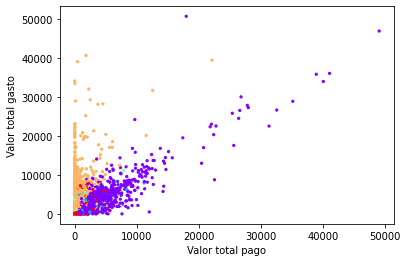

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap="rainbow")
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")

plt.show()

#Entendo os valores dos Atributos no Cluster

In [ ]:
df.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        1538.0  1143.712630  1664.669654  ...         0.083333  0.545455  1.0
1         412.0  1987.146873  1852.215743  ...         0.000000  0.000000  1.0
2        2648.0  3038.132314  2479.290949  ...         0.000000  0.000000  0.6
3        1071.0  1795.836702  1983.632225  ...         0.083333  0.142857  1.0
4        3281.0   443.767052   846.269966  ...         0.000000  0.444444  1.0

[5 rows x 128 columns]

In [ ]:
centroids = cluster.cluster_centers_
centroids

array([[1.59893172e-01, 2.45101382e-04, 4.38385714e-01, 2.57205740e-01,
        1.81351596e-01, 2.60404572e-02, 2.04213900e-04, 8.90367629e-05,
        1.50434389e-04, 9.40165310e-06, 1.70436759e-04, 6.17221746e-03,
        6.03815441e-01, 4.02876087e-01, 8.52134751e-02, 7.19112993e-05],
       [3.32972556e-01, 2.68240066e-04, 1.58923673e-01, 3.62178588e-02,
        1.23089552e-01, 5.82140753e-02, 1.66817881e-04, 2.64295391e-05,
        1.47135264e-04, 1.92748591e-05, 4.26896159e-04, 3.86195702e-03,
        3.76646957e-01, 2.52402941e-01, 6.79571553e-01, 4.22964707e-06],
       [5.04294070e-01, 2.72242076e-04, 6.17554553e-02, 3.62405829e-02,
        2.55365937e-02, 2.52765717e-01, 6.72943541e-05, 2.57072238e-05,
        4.50409323e-05, 5.74261583e-05, 1.15669149e-03, 1.33139220e-03,
        7.19260678e-01, 1.66160406e-01, 1.79203910e-01, 5.52512128e-07],
       [2.35481987e-01, 2.16532182e-04, 6.00600804e-02, 3.39871776e-02,
        2.60781223e-02, 4.00599972e-01, 5.26908300e-05, 2.041

In [ ]:
max = len(centroids[0])
for i in range(max):
  print(df.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


In [ ]:
BALANCE 0.0224
PURCHASES 0.0197
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0279

In [ ]:
description = df.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1143.712630,3274.692952,186.045097,4103.875261,3046.004076,1538
1,1987.146873,858.326286,420.107194,2226.699029,1338.974045,412
2,3038.132314,385.096760,1636.114441,4496.336858,968.599396,2648
3,1795.836702,470.954463,3272.160223,3975.416631,4704.149015,1071
4,443.767052,629.212624,141.652025,5129.746043,814.456295,3281


#Interpretando os Clusters